In [4]:
# import required libraries and modules
import pandas as pd
import numpy as np
from datetime import date, timedelta
from dateutil.relativedelta import *
from random import random, randint
from ipywidgets import Layout, Box
import ipywidgets as widgets

In [24]:
items_layout = Layout(flex='auto', width='auto', height='auto')    
style = {'description_width': '100px'}

# base, starting number of items sold on week-0
level = widgets.IntText(value=100, description='Level', style=style, layout=items_layout)

# starting date of the data-set, picked at random
startdate = widgets.DatePicker(value=date(2008, 1, 1), description='StartDate', style=style, layout=items_layout)

# type of trend 
trend = widgets.Dropdown(options=[('Constant'), ('Linear')], value='Constant',
                                    description='Trend', style=style, layout=items_layout)

# what is the interval that we are generating the data for
intervalType = widgets.Dropdown(options=[('Yearly'), ('Monthly'), ('Weekly')], 
                                value='Monthly', description='Interval Type',
                                style=style, layout=items_layout)

# number of weeks or months or years
intervals = widgets.IntText(value=100, description='Intervals', style=style, layout=items_layout)

# seasonality needs to be an equation where we provide a value for month/week/day
# also get the types of seasonality
seasonality = widgets.FloatSlider(value=0.25, min=0.0, max=1.0, step=0.05, 
                                  description='Seasonality', disabled=False, 
                                  style=style, layout=items_layout)

# how much random fluctuation do we want to add to the data
residue = widgets.FloatSlider(value=0.25, min=0.0, max=1.0, step=0.05,
                              description='Residue', disabled=False, 
                              style=style, layout=items_layout)

items = [level, startdate, trend, intervalType, intervals, seasonality, residue]
box_layout = Layout(display='flex', flex_flow='column', align_items='stretch', width='400px')
box = Box(children=items, layout=box_layout)

box

Box(children=(IntText(value=100, description='Level', layout=Layout(flex='auto', height='auto', width='auto'),…

In [8]:
def getTrendPoint(trend='linear', **kwargs):
    if trend == 'linear':
        m, x, c = kwargs["m"], kwargs["x"], kwargs["c"]
        return (m * x + c)
    elif trend == 'curve_up':
        # need equations
        pass
    elif trend == 'curve_down':
        # need equations
        pass
    else:
        return c

In [26]:
currentDate = startdate.value
print(type(currentDate))
print(currentDate)
trend_t, seasonality_t, variability_t, promotion_t, outOfStock_t, final_t = 0, 0, 0, 0, 0, 0 

cols = ['week', 'date', 'baseline', 'promotion', 'out_of_stock', 'final']
df = pd.DataFrame(columns=cols)

# looping through the intervals
for i in range(intervals.value):
    currentDate += relativedelta(year=+1 if intervalType.value=='Yearly' else 0
                                 ,months=+1 if intervalType.value=='Monthly' else 0
                                 ,weeks=+1 if intervalType.value=='Weekly' else 0
                                 ,days=+1 if intervalType.value=='Daily' else 0
                                )
    # 
    trend_t = getTrendPoint('linear', **{"m":1.0, "x":i, "c":0})
    
    # SIN wave as seasonality
    seasonality_t = np.sin(np.pi * i / 26) * seasonality.value * level.value
    
    # add random noise
    variability_t = (random() - random()) * residue.value * level.value
    
    # sum if greater than 0, else 0 
    # sum will never be < 0 though
    baseline_t = 0 if level.value + trend_t + seasonality_t + variability_t < 0 else level.value + trend_t + seasonality_t + variability_t
    
    # 2% chance that there is a promotion
    promotion_t = (1 if random() <= 0.02 else 0) * random() * baseline_t
    
    # 2% chance of items out of stock
    outOfStock_t = (1 if random() <= 0.02 else 0) * random()**2 * baseline_t
    
    # final number as sum of all the above
    final_t = baseline_t + promotion_t - outOfStock_t
    
#     final2 =  A * w**4 + B * w**3 + C * w**2 + D * w + E
    
    df = df.append({
            'week': i, 
            'date': currentDate,  
            'baseline': baseline_t, 
            'promotion': promotion_t, 
            'out_of_stock': outOfStock_t, 
            'final': final_t
#             'final2': final2
        }, ignore_index=True)
    
df.head()

<class 'datetime.date'>
2008-01-01


,week,date,baseline,promotion,out_of_stock,final
0,0,2008-02-01,81.882163,0.000000,0.0,81.882163
1,1,2008-03-01,100.925459,0.000000,0.0,100.925459
2,2,2008-04-01,120.701709,0.000000,0.0,120.701709
3,3,2008-05-01,93.662112,0.000000,0.0,93.662112
4,4,2008-06-01,125.312071,90.911337,0.0,216.223408


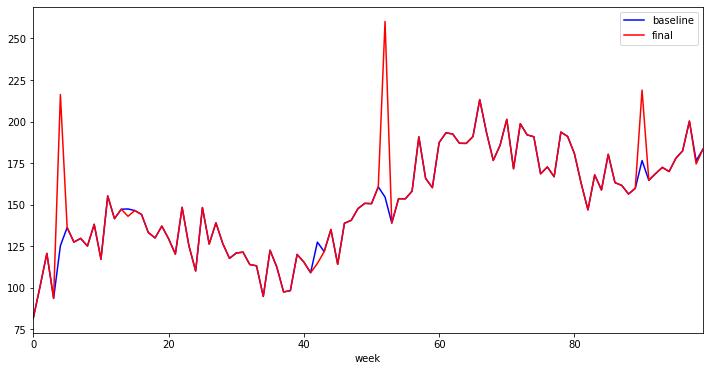

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# define axes if we want to put multiple plots in the same fig
ax = plt.gca()

df.plot(kind='line', x='week', y='baseline', color='blue', figsize=(12, 6), ax=ax)
df.plot(kind='line', x='week', y='final', color='red', figsize=(12, 6), ax=ax)
plt.show()

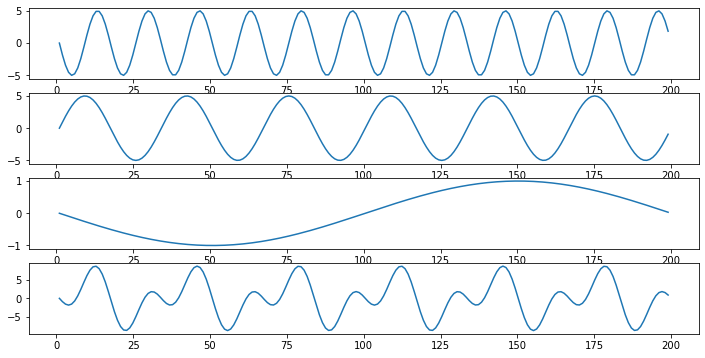

In [28]:
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(1, 200, 200, endpoint=False)

plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
sig1 = 5 * np.sin(2 * np.pi * t * 12)
plt.plot(t, sig1)

plt.subplot(4, 1, 2)
sig2 = 5 * np.sin(-2 * np.pi * t * 6)
plt.plot(t, sig2)

plt.subplot(4, 1, 3)
sig3 = 1 * np.sin(2 * np.pi * t )
plt.plot(t, sig3)

plt.subplot(4, 1, 4)
sig4 = sig1 + sig2 
plt.plot(t, sig4)


In [ ]:
# the simplest form of periodic data is y(t) =A cos(ωt) +B sin(ωt)
# The period of y(t) is the shortest time taken for y(t) to repeat itself, and it is 2π/ω
# y(t) =(k=1 to infinity)∑[A_k cos(ω_k t) + B_k sin(ω_k t)]
# Fourier expansion of y(t)